In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from jax import jit
import jaxquantum as jqt
import jax.numpy as jnp
import matplotlib.pyplot as plt

In [8]:
omega_q = 5.0 #GHzz
Omega = jnp.array([.1, .2, .3])
g_state = jqt.basis(2,0) ^ jqt.basis(2,0)
g_state_dm = g_state.to_dm()

ts = jnp.linspace(0,5*jnp.pi/Omega[0],101)
c_ops = jqt.Qarray.from_list([0.05*jqt.sigmam()^jqt.identity(N=2), 0.1*jqt.sigmam()^jqt.identity(N=2)])

sz0 = jqt.sigmaz() ^ jqt.identity(N=2)

@jit
def Ht(t):
    H0 = omega_q/2.0*((jqt.sigmaz()^jqt.identity(N=2)) + (jqt.identity(N=2)^jqt.sigmaz()))
    H1 = Omega*jnp.cos((omega_q)*t)*((jqt.sigmax()^jqt.identity(N=2)) + (jqt.identity(N=2)^jqt.sigmax()))
    return H0 + H1

solver_options = jqt.SolverOptions.create(progress_meter=True)

In [9]:
# g_state_dm = jqt.Qarray.from_list([g_state_dm, g_state_dm, g_state_dm])

In [10]:
g_state_dm

Quantum array: dims = ((2, 2), (2, 2)), bdims = (), shape = (4, 4), type = oper
Qarray data =
[[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 0.+0.j]]

In [11]:
states = jqt.mesolve(
    Ht, g_state_dm, ts, c_ops=c_ops, solver_options=solver_options
)

100% |██████████| [00:00<00:00, 588.29%/s]


In [12]:
szt = jnp.real(jqt.overlap(sz0, states))

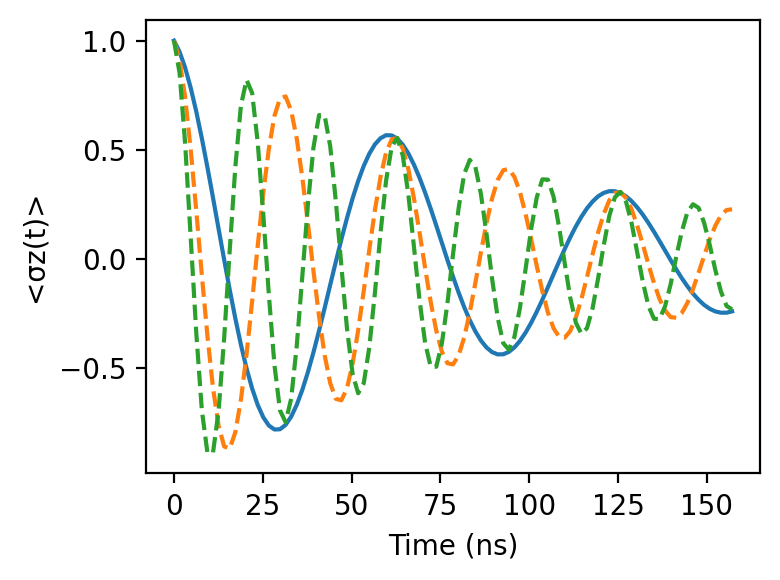

In [13]:
fig, ax = plt.subplots(1, dpi=200, figsize=(4,3))
ax.plot(ts, szt[:,0], "-")
ax.plot(ts, szt[:,1], "--")
ax.plot(ts, szt[:,2], "--")
ax.set_xlabel("Time (ns)")
ax.set_ylabel("<σz(t)>")
fig.tight_layout()

In [6]:
omega_qs = jnp.array([4,5,6.0]) #GHzz
Omega = .1
g_state = jqt.basis(2,0) ^ jqt.basis(2,0)
g_state_dm = g_state.to_dm()

ts = jnp.linspace(0,5*jnp.pi/Omega,101)
c_ops = [0.1*jqt.sigmam()^jqt.identity(N=2)]

sz0 = jqt.sigmaz() ^ jqt.identity(N=2)

@jit
def Ht(t):
    H0 = omega_qs/2.0*((jqt.sigmaz()^jqt.identity(N=2)) + (jqt.identity(N=2)^jqt.sigmaz()))
    H1 = Omega*jnp.cos((omega_qs)*t)*((jqt.sigmax()^jqt.identity(N=2)) + (jqt.identity(N=2)^jqt.sigmax()))
    return H0 + H1

# solver_options = jqt.SolverOptions.create(progress_meter=True)
# states = jqt.mesolve(g_state_dm, ts, c_ops=c_ops, Ht=Ht, solver_options=solver_options) 
# szt = jnp.real(jqt.calc_expect(sz0, states))


# fig, ax = plt.subplots(1, dpi=200, figsize=(4,3))
# ax.plot(ts, szt)
# ax.set_xlabel("Time (ns)")
# ax.set_ylabel("<σz(t)>")
# fig.tight_layout()

In [9]:
solver_options = jqt.SolverOptions.create(progress_meter=True)
states = jqt.mesolve(g_state_dm, ts, c_ops=c_ops, Ht=Ht, solver_options=solver_options) 

ValueError: `terms` must be a PyTree of `AbstractTerms` (such as `ODETerm`), with structure <class 'diffrax._term.AbstractTerm'>

In [7]:
Ht(0.0)

Quantum array: dims = ((2, 2), (2, 2)), bdims = (3,), shape = (3, 4, 4), type = oper
Qarray data =
[[[ 4. +0.j  0.1+0.j  0.1+0.j  0. +0.j]
  [ 0.1+0.j  0. +0.j  0. +0.j  0.1+0.j]
  [ 0.1+0.j  0. +0.j  0. +0.j  0.1+0.j]
  [ 0. +0.j  0.1+0.j  0.1+0.j -4. +0.j]]

 [[ 5. +0.j  0.1+0.j  0.1+0.j  0. +0.j]
  [ 0.1+0.j  0. +0.j  0. +0.j  0.1+0.j]
  [ 0.1+0.j  0. +0.j  0. +0.j  0.1+0.j]
  [ 0. +0.j  0.1+0.j  0.1+0.j -5. +0.j]]

 [[ 6. +0.j  0.1+0.j  0.1+0.j  0. +0.j]
  [ 0.1+0.j  0. +0.j  0. +0.j  0.1+0.j]
  [ 0.1+0.j  0. +0.j  0. +0.j  0.1+0.j]
  [ 0. +0.j  0.1+0.j  0.1+0.j -6. +0.j]]]